# Lab 04 - K-Nearest Neighbours

In this lab we are going to train a model based on K-Nearest neighbours algorithm. We are using the infamous 
'iris dataset' for this lab. 

This data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. We 
are going to use the petal and sepal data and predict the type of iris in each instance.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

Let's load the dataset. Sci-kit learn has the iris dataset inbuilt. 

In [2]:
data, target = datasets.load_iris(return_X_y=True, as_frame=True)
combine = pd.concat([data, target], axis=1, sort=False)
combine.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Analysis

Let's visualize the data and see how the data is distributed. We are goinf to use a 3d plot for this. For 3d plots we will use 
matplotlib library.

The dataset has 4 features, but because it is a 3d plot we can only plot 3. So we are going to use first 3 features and 
plot. 

[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

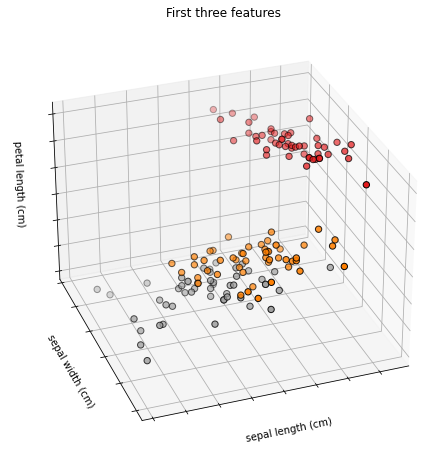

In [3]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110) 
ax.scatter(data["sepal length (cm)"], data["sepal width (cm)"], data["petal length (cm)"], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three features")
ax.set_xlabel("sepal length (cm)")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("sepal width (cm)")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal length (cm)")
ax.w_zaxis.set_ticklabels([])

Let's take another set of features and plot the same graph and see what patterns we can see.

[Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, ''),
 Text(2.5, 0, ''),
 Text(3.0, 0, '')]

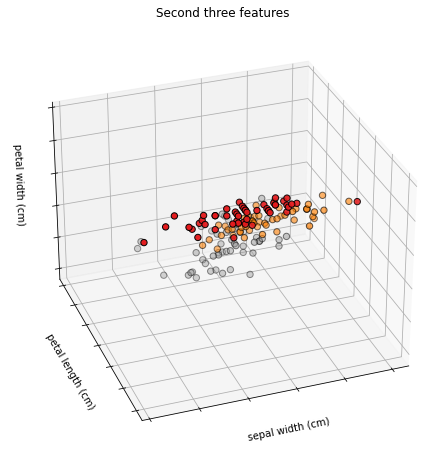

In [4]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110) 
ax.scatter(data["sepal width (cm)"], data["petal length (cm)"], data["petal width (cm)"], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Second three features")
ax.set_xlabel("sepal width (cm)")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("petal length (cm)")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("petal width (cm)")
ax.w_zaxis.set_ticklabels([])

We can see that one class is linearly separable from others at least from one feature. And other classes also show good 
separability in first plot. So KNN algorithm should give us really good results.

## Pre-processing

Let's see the summary of the data we have.

In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Before we train the model, we have to normalize the data. We can use MinMaxScaler() function provided by sci-kit learn 
to do this. You can see the documentation of this function 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler): 

In [6]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
data_scaled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now, let's divide our data into train and test sets. We will split up 40% of the data in to the test set and 60% for training.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.4)

## Modeling

Now we can train the KNN algorithm on this data and make predictions. Scikit-Learn has the sklearn.neighbors
library, which contains built-in classes/methods for various k-nearest neighbors algorithms. You can find all the 
algorithm implementations [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors).

We have imported the KNeighborsClassifier class from the sklearn.neighbors library already. Let's initialize an instance of it with the most basic parameter which is the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start off, 5 seems to be the most commonly used value for KNN algorithm.

In [8]:
fivenn = KNeighborsClassifier(n_neighbors=5)

For more information refer the 
[official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Let's train this model using the normalized dataset.

In [9]:
fivenn.fit(X_train, y_train)

KNeighborsClassifier()

Let's evaluate this model using test set.

In [10]:
pred = fivenn.predict(X_test)

default_acc = metrics.accuracy_score(y_test, pred)

print("Accuracy for model k=5:", default_acc)

Accuracy for model k=5: 0.9666666666666667


## Evaluation

Upto now we have used the default values for hyperparameters of KNN algorithm. Let's do some hyperparameter tuning and try 
to figure out which set of values are the best for our dataset by doing simple analysis. 

### Distance metric

Sci-kit learn's KNN classifier uses Minkowski distance with p=2 as the default distance metric. Let's train a model 
with p=1, which is the manhattan distance.

In [11]:
manhattanNN = KNeighborsClassifier(n_neighbors=5, p=1)
manhattanNN.fit(X_train, y_train)
pred = manhattanNN.predict(X_test)

manhattan_acc = metrics.accuracy_score(y_test, pred)
print("Accuracy for model k=5, p=1:", manhattan_acc)

Accuracy for model k=5, p=1: 0.9833333333333333


### K

Let's see how different values of K affect the accuracy score. We are training models using k=1 to k=60.

In [12]:
accuracy = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))



Text(0, 0.5, 'Accuracy')

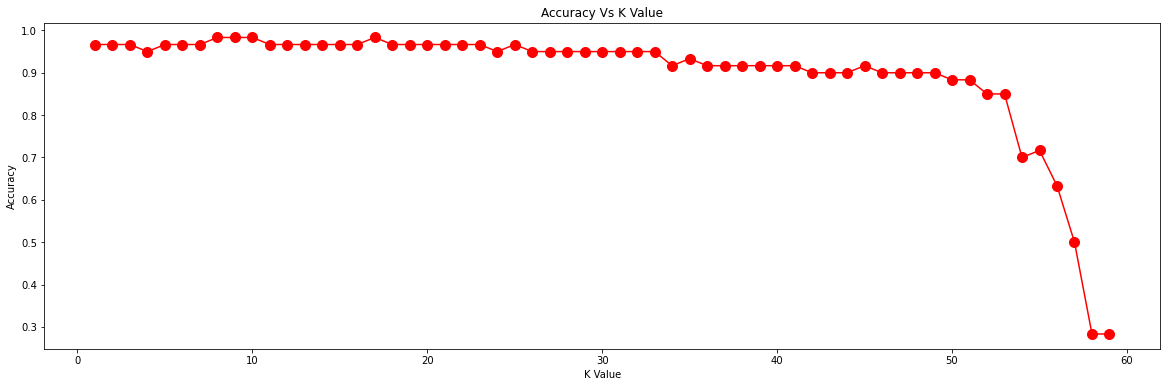

In [13]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

## Task

Use your cleaned dataset from last week, you can use any set of features you prefer. (Do the following. Read the 
documentation on KNN algorithm when you need information about different parameters.)

* Normalize the data.
* Divide the dataset into 0.7, 0.3 for train and test set respectively.
    * Identify the best K value when;
         1.manhattan distance is used
         2.euclidean distance is used
    * Identify the best K value when;
         1. uniform weights are used
         2. points are weighted by the inverse of their distance
    * Find the average performance over 30 runs for each combination by changing the training and testing data. Use 
    accuracy, precision and recall as performance metrices. What is the reason for getting different values for 
    performance at each run?
* Split up 50% of the data in to the test set and 50% for training and then do everything you did above again.
* What is the data_split, weight_type, distance_type and K_value combination that gives the most accurate prediction?